In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [260]:
filename = f"distance-lr-straight.csv"

headers = ["anc1_dt", "anc1_dist", "anc0_dt", "anc0_dist", "anc2_dt", "anc2_dist", "gnss_dt", "gnss_dist"]
# headers = ["anc0_dt", "anc0_dist", "anc2_dt", "anc2_dist", "gnss_dt", "gnss_dist", "anc1_dt", "anc1_dist"]
dtypes = {"anc1_dt": float, "anc1_dist": float, "anc0_dt": float, "anc0_dist": float, "anc2_dt": float, "anc2_dist": float, "gnss_dt": float, "gnss_dist": float}
# parse_dates = ["anc1_dt", "anc0_dt", "anc2_dt", "gnss_dt"]
df = pd.read_csv(filename, delimiter=',', header=0, names=headers, dtype=dtypes)
# filter_dt = [datetime(2024, 7, 5, 15, 8, 40).timestamp(), datetime(2024, 7, 5, 15, 9, 35).timestamp()]
# time_filter = ("04:58:02", "04:58:25")
time_filter = ("05:09:00", "05:09:45")


In [261]:
gnss_data = df[["gnss_dist", "gnss_dt"]]
gnss_data.index = pd.to_datetime(df["gnss_dt"], unit='s')
gnss_data = gnss_data.between_time(*time_filter)


In [262]:
uwb_data = df["anc0_dist"]
uwb_data.index = pd.to_datetime(df["anc0_dt"], unit='s')
uwb_data = uwb_data.between_time(*time_filter)


In [263]:
interp_gnss = np.interp(uwb_data.index, gnss_data.index, gnss_data["gnss_dist"])
gnss_copy = pd.Series(interp_gnss, index=uwb_data.index)
# 
# gnss_data = gnss_data.loc[:, 2] = interp_gnss

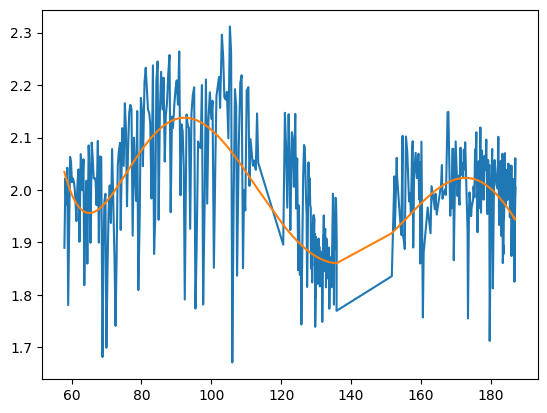

In [264]:
diff = uwb_data - interp_gnss
plt.plot(uwb_data, diff)
poly = np.polynomial.polynomial.Polynomial.fit(uwb_data, diff, 6)
d = poly(uwb_data)
plt.plot(uwb_data, d)
# diff.plot()

In [267]:
poly(100)
poly.domain
poly.coef
poly.domain


array([ 57.937633, 187.039706])

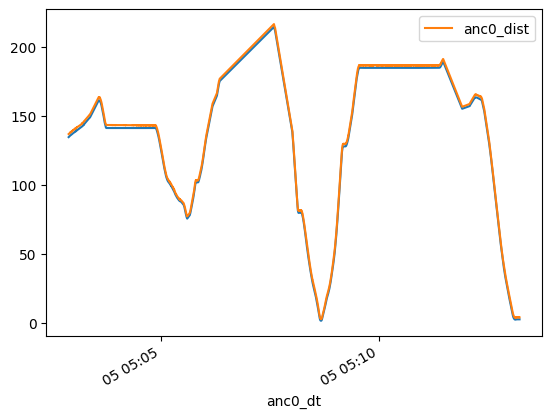

In [115]:
ax = gnss_copy.plot()
ax2 = uwb_data.plot(ax=ax)
ax.legend()
ax2.legend()

In [110]:
# plt.plot(uwb_data[:,0], uwb_data[:,1], 'r-', uwb_data[:, 0], interp_gnss, 'g-')


KeyError: 'key of type tuple not found and not a MultiIndex'

In [32]:
# diff = uwb_data[:,1] - interp_gnss

In [197]:
plt.plot(uwb_data[:, 1], diff)

KeyError: 'key of type tuple not found and not a MultiIndex'

In [203]:
from filterpy.kalman import ExtendedKalmanFilter

In [ ]:
ekf = ExtendedKalmanFilter(4, 2)